In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,12)
figure(figsize=(100, 80), dpi=80)

<Figure size 8000x6400 with 0 Axes>

<Figure size 8000x6400 with 0 Axes>

In [2]:
tf.random.set_seed(12345)

In [3]:
df = pd.read_csv('alicante_Autobuses_Flow.csv')

In [4]:
df

,time,value
0,1.588284e+09,5709.6710
1,1.588284e+09,5709.6710
2,1.588284e+09,5709.6710
3,1.588284e+09,5709.6710
4,1.588284e+09,5709.6710
...,...,...
1271634,1.625695e+09,6332.8800
1271635,1.625695e+09,6106.2866
1271636,1.625695e+09,6923.0366
1271637,1.625695e+09,6936.6025


In [5]:
df = df.drop_duplicates(subset = 'time', keep='first')

In [6]:
df = df.reset_index(drop=True)

In [7]:
Time = []

for i in range(0, len(df)):
    Time.append(datetime.datetime.fromtimestamp(df['time'][i]).strftime('%Y-%m-%d %H:%M:%S'))

In [8]:
df['time'] = Time

In [9]:
df['value'].isnull().sum()

0

In [10]:
df.columns = ['Time','Values']

In [11]:
df

,Time,Values
0,2020-04-30 22:00:00,5709.6710
1,2020-04-30 22:00:31,5211.6226
2,2020-04-30 22:01:02,5062.5280
3,2020-04-30 22:01:32,5719.4990
4,2020-04-30 22:02:03,5590.1340
...,...,...
1219996,2021-07-07 21:57:02,6332.8800
1219997,2021-07-07 21:57:32,6106.2866
1219998,2021-07-07 21:58:02,6923.0366
1219999,2021-07-07 21:58:32,6936.6025


In [12]:
df['Time'] = pd.to_datetime(df['Time'])
df1 = df.set_index('Time')
Min_summary = df1.resample('30T').mean()

In [13]:
Min_summary

,Values
Time,
2020-04-30 22:00:00,5329.363053
2020-04-30 22:30:00,4698.188646
2020-04-30 23:00:00,4287.926002
2020-04-30 23:30:00,3266.890498
2020-05-01 00:00:00,3117.347702
...,...
2021-07-07 19:30:00,9135.355831
2021-07-07 20:00:00,7877.871636
2021-07-07 20:30:00,7532.304007


In [14]:
index = np.arange(len(Min_summary))

In [15]:
df = pd.DataFrame({
    'Time':Min_summary.index,
    'Values':Min_summary['Values']
})

In [16]:
df.index = index

In [17]:
df

,Time,Values
0,2020-04-30 22:00:00,5329.363053
1,2020-04-30 22:30:00,4698.188646
2,2020-04-30 23:00:00,4287.926002
3,2020-04-30 23:30:00,3266.890498
4,2020-05-01 00:00:00,3117.347702
...,...,...
20779,2021-07-07 19:30:00,9135.355831
20780,2021-07-07 20:00:00,7877.871636
20781,2021-07-07 20:30:00,7532.304007
20782,2021-07-07 21:00:00,6769.658017


In [18]:
df.to_csv('data_autobus.csv')

In [19]:
df['Values'].isnull().sum()

59

In [20]:
Values = df['Values'].values

In [21]:
Values.shape

(20784,)

In [22]:
import numpy.ma as ma

In [23]:
X = ma.masked_invalid(Values).reshape(-1,1)
X[X==0]=ma.masked

In [24]:
X.min()

1289.815240740741

In [25]:
from sklearn.preprocessing import MinMaxScaler
# Function for Scaler Application
def Scaler(X):
    #scaler = MinMaxScaler()
    # Fit Scaler
    #scaler_X = scaler.fit(X)
    # Transform Data
    #X_ = scaler_X.transform(X)
    minX = X.min()
    X+=minX
    maxX = X.max()
    X = X/maxX
    return minX,maxX,X

In [26]:
minX,maxX,scaled_x = Scaler(ma.compress_rows(X))

In [27]:
scaled_x.max()

1.0

In [28]:
X[-100:]

masked_array(
  data=[[9148.86678813559],
        [8826.074684745763],
        [7910.698225423726],
        [7224.494143103446],
        [6416.164491666669],
        [5580.040383050848],
        [5853.2976949152535],
        [5291.367823728814],
        [4535.3740206896555],
        [3482.7297559322024],
        [3809.1474189655173],
        [3820.553872413793],
        [4452.410798181818],
        [4321.532308474577],
        [4395.261936206896],
        [4089.6850086206887],
        [4631.093564406781],
        [5678.141018644068],
        [7873.707805084748],
        [9553.317281355932],
        [10486.963416949151],
        [10662.848330508472],
        [11232.85593220339],
        [11163.680152542374],
        [11084.115374999996],
        [11408.53256779661],
        [10782.81625423729],
        [11112.118355932203],
        [10097.744728813555],
        [9804.04788135593],
        [8846.992916949152],
        [9078.680137288135],
        [9150.137650847455],
        [9393.561981

In [29]:
scaled_x.min()

0.11059157939725338

In [30]:
def inverse_scaler(scaled_x,minX,maxX):
    return scaled_x*maxX-minX

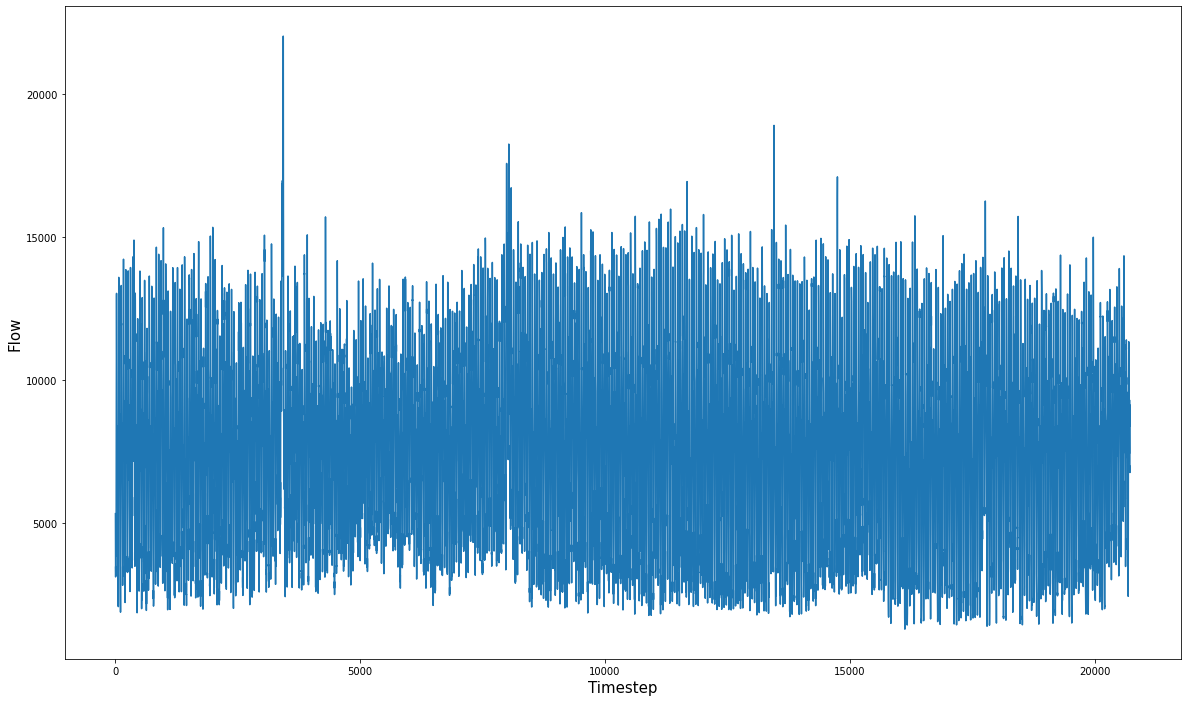

In [39]:
plt.plot(inverse_scaler(scaled_x, minX, maxX))
plt.xlabel('Timestep', fontsize=15)
plt.ylabel('Flow', fontsize=15)
plt.savefig('data.jpg')
plt.show()

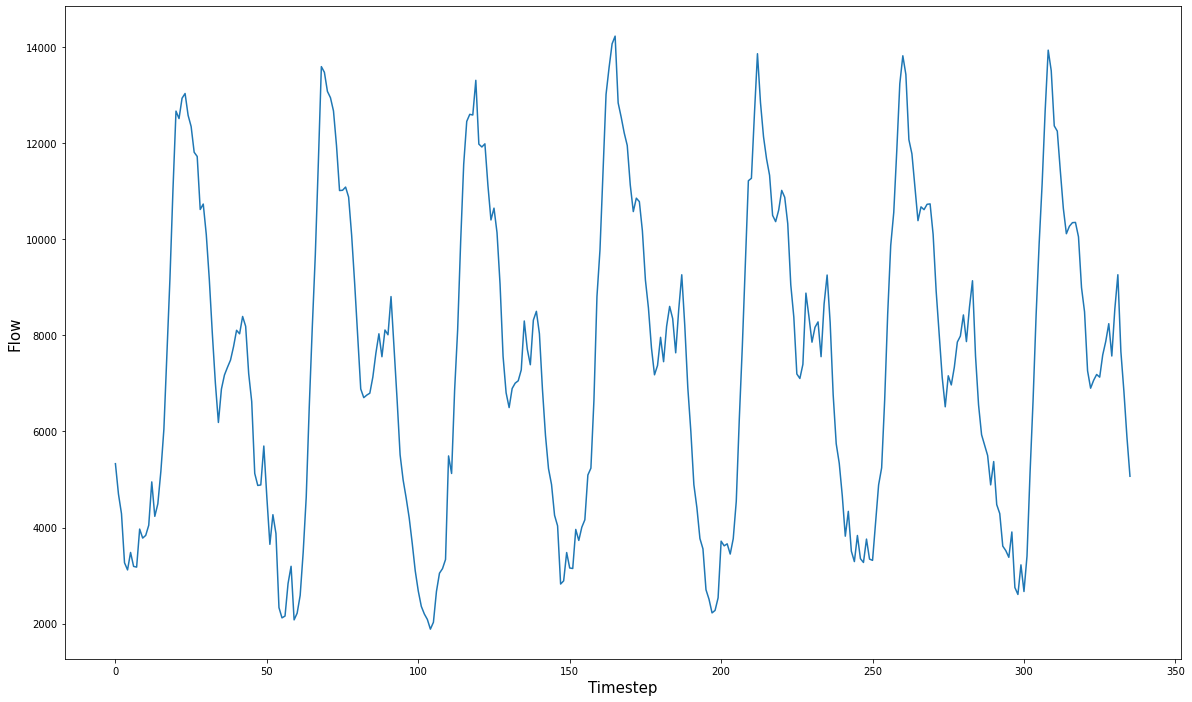

In [40]:
plt.plot(inverse_scaler(scaled_x[:336], minX, maxX))
plt.xlabel('Timestep', fontsize=15)
plt.ylabel('Flow', fontsize=15)
plt.savefig('7DaysSample.jpg')
plt.show()

In [32]:
scaled_x*maxX-minX

array([[5329.36305254],
       [4698.18864576],
       [4287.92600169],
       ...,
       [7532.30400678],
       [6769.65801695],
       [6984.64495345]])

In [33]:
scaled_X = ma.zeros(X.shape)
scaled_X[~X.mask[:,0]] = scaled_x
scaled_X[X.mask] = ma.masked


In [34]:
import h5py

In [35]:
f = h5py.File("autobuses_processed_data.h5","w")
v_ = f.create_dataset("raw_values",shape=Values.shape,dtype="float")
v_[...] = Values

x_ = f.create_dataset("scaled_x",shape=scaled_X.shape,dtype="float")
x_[...] = scaled_X

minx_ = f.create_dataset("minX",shape=(1,),dtype="float")
minx_[...] = minX

maxx_ = f.create_dataset("maxX",shape=(1,),dtype="float")
maxx_[...] = maxX


x_mask = f.create_dataset("x_mask",shape=scaled_X.shape,dtype="Bool")
x_mask[...] = scaled_X.mask

f.close()

In [36]:
f = h5py.File("autobuses_processed_data.h5","r")
scaled_X_ = ma.array(f["scaled_x"])
scaled_X_.mask = ma.array(f["x_mask"])
f.close()

In [37]:
import matplotlib.pyplot as plt

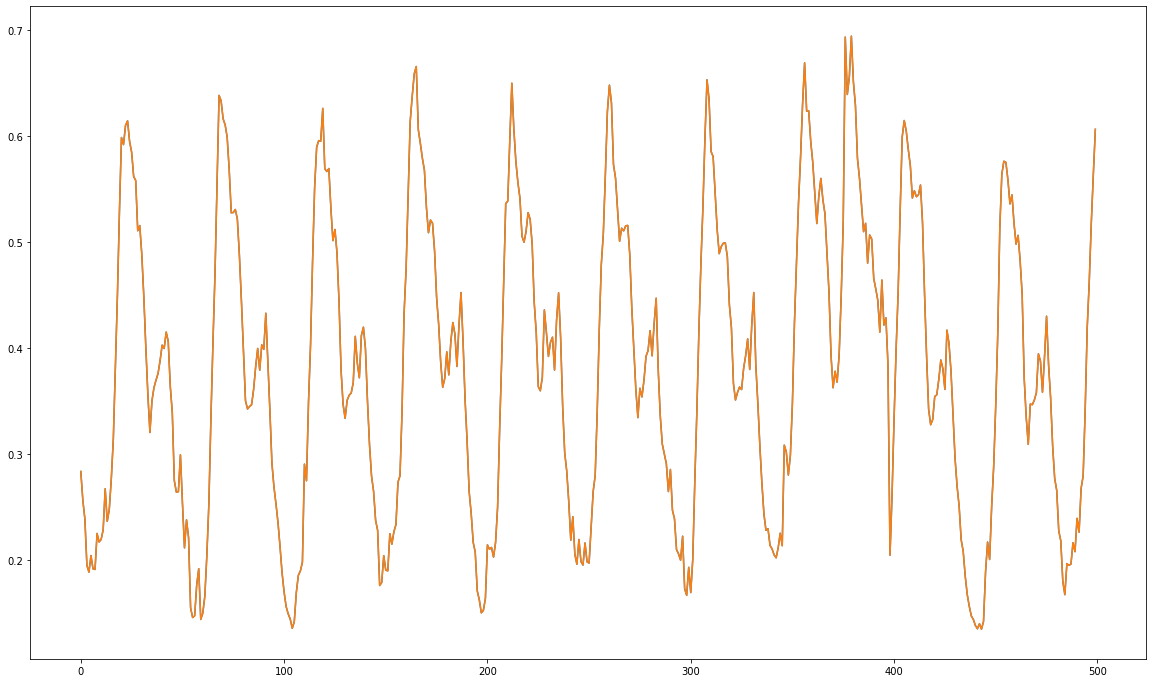

In [38]:
plt.plot(scaled_X_[:500])
plt.plot(scaled_X[:500])
plt.show()

In [39]:
import re #python regular expression matching module
script = re.sub(r'# In\[.*\]:\n','',open('1.0-DataPreparation.py').read())
with open('1.0-DataPreparationScript.py','w') as fh:
    fh.write(script)

FileNotFoundError: [Errno 2] No such file or directory: '1.0-DataPreparation.py'